# TASK: CREDIT CARD FRAUD DETECTION

DOMAIN : MACHINE LEARNING

# Importing the Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Data Collection and Processing

In [49]:
# Creating a DataFrame using CSV file
data=pd.read_csv("fraudTest.csv")

In [50]:
## print first five rows of the DataFrame
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [51]:
# print the number of rows and columns
data.shape

(555719, 23)

In [52]:
# checking the null values
data.isnull().sum().sum()

0

In [53]:
# display column names 
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [54]:
# Dropping irrelevant features
data.drop(["Unnamed: 0", "trans_date_trans_time","cc_num","merchant",'first', 'last','street', 'zip','city_pop',
           'trans_num', 'unix_time','merch_lat', 'merch_long','dob'],axis=1,inplace=True)

In [55]:
data.head()

,category,amt,gender,city,state,lat,long,job,is_fraud
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,Mechanical engineer,0
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",0
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,"Librarian, public",0
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,Set designer,0
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,Furniture designer,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   category  555719 non-null  object 
 1   amt       555719 non-null  float64
 2   gender    555719 non-null  object 
 3   city      555719 non-null  object 
 4   state     555719 non-null  object 
 5   lat       555719 non-null  float64
 6   long      555719 non-null  float64
 7   job       555719 non-null  object 
 8   is_fraud  555719 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 38.2+ MB


In [57]:
# Statistical analysis
data.describe()

,amt,lat,long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,0.003860
std,156.745941,5.061336,13.721780,0.062008
min,1.000000,20.027100,-165.672300,0.000000
25%,9.630000,34.668900,-96.798000,0.000000
50%,47.290000,39.371600,-87.476900,0.000000
75%,83.010000,41.894800,-80.175200,0.000000
max,22768.110000,65.689900,-67.950300,1.000000


In [58]:
# Checking for duplicate data
data.duplicated().any()

True

In [59]:
data.duplicated().sum()

4496

In [60]:
# Drop the dupliucate rows
data=data.drop_duplicates()
data.shape

(551223, 9)

In [61]:
data.duplicated().any()

False

In [62]:
# Categorise the legal and fraud Transactions 
fraud=data["is_fraud"].value_counts()

In [63]:
fraud

is_fraud
0    549079
1      2144
Name: count, dtype: int64

The data is highly biased

class=0 represents legal Transactions and class=1 represents fraud Transactions

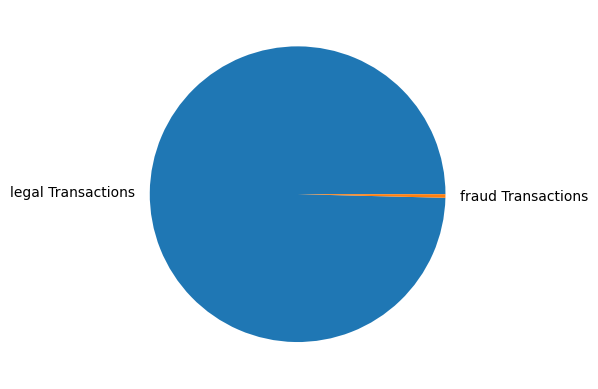

In [64]:
plt.pie(fraud.values,labels=["legal Transactions","fraud Transactions"])
plt.show()

In [65]:
print("percentage of legitimate data:",549079*100/551223)
print("percentage of fraud data:",2144*100/551223)

percentage of legitimate data: 99.61104670886374
percentage of fraud data: 0.3889532911362552


In [66]:
legal=data[data["is_fraud"]==0]
fraud=data[data["is_fraud"]==1]

In [67]:
print(legal.shape)

(549079, 9)


In [68]:
print(fraud.shape)

(2144, 9)


# Under-Sampling

In [69]:
# Build a Sample Dataset contain similar Distribution  for Legal Transactions and Fraud Transaction 
legal_sample=legal.sample(n=2144)

In [70]:
# concatenate the DataFrames
new_data = pd.concat([legal_sample, fraud], axis = 0)
new_data

,category,amt,gender,city,state,lat,long,job,is_fraud
178555,gas_transport,63.65,F,Rosewood,OH,40.2158,-83.9579,Professor Emeritus,0
73503,kids_pets,6.37,F,Steuben,ME,44.4971,-67.9503,Make,0
412827,food_dining,54.35,M,Atlantic,VA,37.9073,-75.5089,"Geologist, engineering",0
418195,grocery_net,45.13,M,Smackover,AR,33.3398,-92.7442,Financial adviser,0
345809,personal_care,7.20,M,Moriarty,NM,34.9889,-106.0609,"Therapist, art",0
...,...,...,...,...,...,...,...,...,...
517197,shopping_pos,1041.51,M,Senatobia,MS,34.6323,-89.8855,Database administrator,1
517274,shopping_pos,868.09,M,Senatobia,MS,34.6323,-89.8855,Database administrator,1
517341,shopping_net,1039.42,M,Senatobia,MS,34.6323,-89.8855,Database administrator,1
517529,grocery_pos,289.27,M,Senatobia,MS,34.6323,-89.8855,Database administrator,1


In [71]:
new_data["is_fraud"].value_counts()

is_fraud
0    2144
1    2144
Name: count, dtype: int64

# Label Encoding 

In [72]:
le1=LabelEncoder()
le1.fit(new_data["category"])
new_data["category_le1"]=le1.transform(new_data["category"])

le2=LabelEncoder()
le2.fit(new_data["gender"])
new_data["gender_le2"]=le2.transform(new_data["gender"])

le3=LabelEncoder()
le3.fit(new_data["city"])
new_data["city_le3"]=le3.transform(new_data["city"])

le4=LabelEncoder()
le4.fit(new_data["state"])
new_data["state_le4"]=le4.transform(new_data["state"])

le5=LabelEncoder()
le5.fit(new_data["job"])
new_data["job_le5"]=le5.transform(new_data["job"])

In [73]:
new_data.head()

,category,amt,gender,city,state,lat,long,job,is_fraud,category_le1,gender_le2,city_le3,state_le4,job_le5
178555,gas_transport,63.65,F,Rosewood,OH,40.2158,-83.9579,Professor Emeritus,0,2,0,590,34,320
73503,kids_pets,6.37,F,Steuben,ME,44.4971,-67.9503,Make,0,7,0,650,20,245
412827,food_dining,54.35,M,Atlantic,VA,37.9073,-75.5089,"Geologist, engineering",0,1,1,28,43,185
418195,grocery_net,45.13,M,Smackover,AR,33.3398,-92.7442,Financial adviser,0,3,1,632,2,169
345809,personal_care,7.20,M,Moriarty,NM,34.9889,-106.0609,"Therapist, art",0,10,1,439,31,416


### 

In [74]:
le3.inverse_transform([615])

array(['Scotia'], dtype=object)

In [75]:
new_data=new_data.drop(["category","gender","city","state","job"],axis=1)

In [76]:
new_data.head()

,amt,lat,long,is_fraud,category_le1,gender_le2,city_le3,state_le4,job_le5
178555,63.65,40.2158,-83.9579,0,2,0,590,34,320
73503,6.37,44.4971,-67.9503,0,7,0,650,20,245
412827,54.35,37.9073,-75.5089,0,1,1,28,43,185
418195,45.13,33.3398,-92.7442,0,3,1,632,2,169
345809,7.20,34.9889,-106.0609,0,10,1,439,31,416


# Splitting the new data into Features and Target

In [77]:
X=new_data.drop("is_fraud",axis=1)
Y=new_data["is_fraud"]

In [78]:
X.head()

,amt,lat,long,category_le1,gender_le2,city_le3,state_le4,job_le5
178555,63.65,40.2158,-83.9579,2,0,590,34,320
73503,6.37,44.4971,-67.9503,7,0,650,20,245
412827,54.35,37.9073,-75.5089,1,1,28,43,185
418195,45.13,33.3398,-92.7442,3,1,632,2,169
345809,7.20,34.9889,-106.0609,10,1,439,31,416


In [79]:
Y.head()

178555    0
73503     0
412827    0
418195    0
345809    0
Name: is_fraud, dtype: int64

# Splitting the data into Testing and Traning data

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [81]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3430, 8) (858, 8) (3430,) (858,)


# Model Training

In [82]:
model=LogisticRegression(max_iter=500)

In [83]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

# Model Evaluation

In [84]:
training_predict=model.predict(X_train)
training_predict

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [85]:
testing_predict=model.predict(X_test)
testing_predict

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [86]:
#Precision score of training data
precision_train=metrics.precision_score(training_predict,Y_train)
print("Precision score of training data:",precision_train)

#Precision score of testing data
precision_test=metrics.precision_score(testing_predict,Y_test)
print("Precision score of testing data:",precision_test)

Precision score of training data: 0.7603498542274052
Precision score of testing data: 0.7482517482517482


In [87]:
# Recall score of training data
recall_train=metrics.recall_score(training_predict,Y_train)
print("Recall score of training data:",recall_train)

#Recall score of testing data
recall_test=metrics.recall_score(testing_predict,Y_test)
print("Recall score of testing data:",recall_test)

Recall score of training data: 0.9314285714285714
Recall score of testing data: 0.9304347826086956


In [88]:
# f1-score on training data
f1score_train =metrics.f1_score(training_predict, Y_train)
print('F1-score Score of Training data:',f1score_train)

# f1-score on test data
f1score_test = metrics.f1_score(testing_predict, Y_test)
print('F1-score Score of Testing data:',f1score_test)

F1-score Score of Training data: 0.837239165329053
F1-score Score of Testing data: 0.8294573643410852
